# SIR MODEL CODE


This code begins with setting the total population (N), initial number of infected individuals, recovered individuals, and susceptible individuals. It then sets the beta and gamma variables as the effective contact rates with infected individuals and mean recovery rates. The mean recovery rate is essentially 1/the number of days to recover from the infection. Thus, the recipricol of gamma would give us how long the recovery time for the infection is, and if we know the recovery time, we can calculate gamma. 

The function `numpy.linspace` creates an array between 0-160 with 160 samples. The parameters are (start, stop, number of samples to generate). This is then set as the time interval of the infection modeled.

In [2]:
import numpy as numpy
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

#Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0
I0 = 1
R0 = 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate with an infected individual, beta, and mean recovery rate, gamma, (in 1/days).
beta = 0.2
gamma = 1/10

# A grid of time points (in days)
t = numpy.linspace (0, 160, 160) 
#returns evenly spaced numbers a specified interval (start, stop, number of samples to generate)
#returns an array from 0-160 with 160 number of samples [1, 2, 3, 4.... 160]
#this is the array of the times

The `differentialEqn` function processes and calculates the rates of the proportion of the population that are moving into or out of each class. 

In [3]:
# The SIR model differential equations.
def differentialEqn(y, t, N, beta, gamma):
    S, I, R = y
    # we are assigning the tuple values to S, I, and R
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt
# Giving the rate of change in relation to the proportion of the population

y0 is a tuple of the initial susceptible population, infectious population, and recovered population that's defined in the first block of code. 

The function `odeint()` is a scipy function that integrates a system of ordinary differential equations. The parameters for this function are the function, the initial y value, time value, and extra arguments. Because the function being used is the `differentialEqn` function, other arguments passed in the parameters of `odeint()` would include N, beta, and gamma. 

We can see that the output of the integrated functions are an array of 160 rows and 3 columns. Each row is also represented as its own array as well. The integrated output also shows us that at the first time value (t = 0), the array values are equal and the order is synonymous to the values of the y0 tuple. Each row shows the calculated S, I, and R values at t = a number within the time interval and one of the sample numbers. For example, the second row is when t = 2 and the third row is when t = 3. 

In [4]:
# Initial conditions vector
y0 = S0, I0, R0 
# Above creates a tuple (999, 1, 0)
print("This is the y0 output:", y0)

# Integrate the SIR eqns over the time grid, t.
integrated = odeint(differentialEqn, y0, t, args = (N, beta, gamma))
# odeint integrates a system of ordinary differential equations (func, y0, t, args(tuple--extra arguments to pass to function))
# passes the parameters N, beta, and gamma into the differentialEqn function
# creates a list over the period t
print("This is the integrated output: \n", integrated)

This is the y0 output: (999, 1, 0)
This is the integrated output: 
 [[9.99000000e+02 1.00000000e+00 0.00000000e+00]
 [9.98788525e+02 1.10562053e+00 1.05854624e-01]
 [9.98554771e+02 1.22234204e+00 2.22887057e-01]
 [9.98296409e+02 1.35131910e+00 3.52271529e-01]
 [9.98010872e+02 1.49382365e+00 4.95304260e-01]
 [9.97695328e+02 1.65125635e+00 6.53415861e-01]
 [9.97346656e+02 1.82515884e+00 8.28184864e-01]
 [9.96961420e+02 2.01722707e+00 1.02135261e+00]
 [9.96535835e+02 2.22932557e+00 1.23483935e+00]
 [9.96065735e+02 2.46350299e+00 1.47076225e+00]
 [9.95546537e+02 2.72200860e+00 1.73145449e+00]
 [9.94973204e+02 3.00730991e+00 2.01948643e+00]
 [9.94340200e+02 3.32211145e+00 2.33768850e+00]
 [9.93641449e+02 3.66937465e+00 2.68917603e+00]
 [9.92870285e+02 4.05233860e+00 3.07737618e+00]
 [9.92019401e+02 4.47454174e+00 3.50605688e+00]
 [9.91080798e+02 4.93984426e+00 3.97935818e+00]
 [9.90045723e+02 5.45245089e+00 4.50182568e+00]
 [9.88904620e+02 6.01693383e+00 5.07844642e+00]
 [9.87647058e+02 6.6

`integrated.T` self transposes the integrated array, which changes the axis of the array. As shown in the output below, there are now 3 arrays within the integrated variable array. This makes it easier for us to assign each array to S, I, and R values respectively. The first array would be assigned to S (susceptibles), the second array would be asssigned to I (infecteds), and the third array would be assigned to R (recovered). 

In [6]:
S, I, R = integrated.T
#.T self transposes the array , changes the axis of the array (columns become rows)
# There are 3 arrays, S is assigned to first array, I is assigned to second array, R is assigned to the 3rd array
print("This is integrated.T output: \n", integrated.T)

This is integrated.T output: 
 [[9.99000000e+02 9.98788525e+02 9.98554771e+02 9.98296409e+02
  9.98010872e+02 9.97695328e+02 9.97346656e+02 9.96961420e+02
  9.96535835e+02 9.96065735e+02 9.95546537e+02 9.94973204e+02
  9.94340200e+02 9.93641449e+02 9.92870285e+02 9.92019401e+02
  9.91080798e+02 9.90045723e+02 9.88904620e+02 9.87647058e+02
  9.86261676e+02 9.84736120e+02 9.83056978e+02 9.81209719e+02
  9.79178639e+02 9.76946808e+02 9.74496026e+02 9.71806789e+02
  9.68858271e+02 9.65628324e+02 9.62093501e+02 9.58229103e+02
  9.54009264e+02 9.49407074e+02 9.44394746e+02 9.38943837e+02
  9.33025524e+02 9.26610945e+02 9.19671608e+02 9.12179868e+02
  9.04109474e+02 8.95436180e+02 8.86138427e+02 8.76198058e+02
  8.65601074e+02 8.54338408e+02 8.42406667e+02 8.29808844e+02
  8.16554938e+02 8.02662466e+02 7.88156812e+02 7.73071395e+02
  7.57447625e+02 7.41334613e+02 7.24788655e+02 7.07872462e+02
  6.90654178e+02 6.73206206e+02 6.55603892e+02 6.37924104e+02
  6.20243790e+02 6.02638547e+02 5.85181

Just as an example of the explanation above, when we print the variable S, the program prints out the first array. 

In [58]:
print("This is the S output:\n" , S)

This is the S output:
 [999.         998.78852485 998.5547709  998.29640937 998.01087209
 997.69532779 997.3466563  996.96142032 996.53583508 996.06573476
 995.54653691 994.97320367 994.34020005 993.64144932 992.87028523
 992.01940138 991.08079756 990.04572343 988.90461975 987.64705758
 986.26167619 984.73612027 983.0569776  981.20971853 979.17863889
 976.94680822 974.49602596 971.80678857 968.85827062 965.6283242
 962.09350118 958.22910306 954.00926412 949.40707412 944.39474629
 938.94383706 933.0255237  926.61094483 919.67160815 912.17986829
 904.10947366 895.43618047 886.13842731 876.1980576  865.60107434
 854.33840784 842.40666714 829.80884389 816.55493828 802.66246618
 788.15681168 773.07139528 757.44762515 741.3346135  724.78865514
 707.87246206 690.65417774 673.20620643 655.60389178 637.92410381
 620.24378958 602.6385473  585.18128145 567.94098898 550.98171713
 534.36172192 518.13284311 502.34010038 487.02150365 472.20805276
 457.92391829 444.18675922 431.00815404 418.39411552 4

In [ ]:
Now we can plot the data we have!

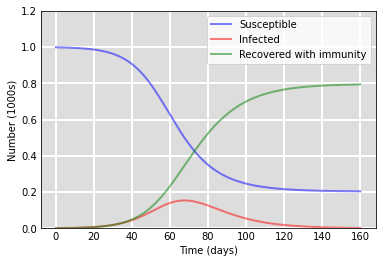

In [59]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)
ax.plot(t, S/1000, 'b', alpha = 0.5, lw = 2, label = 'Susceptible')
ax.plot(t, I/1000, 'r', alpha = 0.5, lw = 2, label = 'Infected')
ax.plot(t, R/1000, 'g', alpha = 0.5, lw = 2, label = 'Recovered with immunity')
# alpha regers to the line opacity
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.grid(b=True, which = 'major', c = 'w', lw = 2, ls = '-')
# b shows grid lines, which = the grid lines to apply changes on, color, linewidth, linestyle
legend = ax.legend()

# Area noting the data area boundaries
for spine in('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(True)
    # true shows the black line of the outer area of the graph

# show the plot of the graphs
plt.show()